In [2]:
import pandas as pd # importing libaries to work on data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  


In [16]:
! pip install mlxtend

In [17]:
import mlxtend #importing libriary to prform the task
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [59]:
df = pd.read_excel("/content/Online retail.xlsx", header=None) #loading the data set

In [20]:
display(df.head(50)) #to show the data

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
5,"whole wheat pasta,french fries"
6,"soup,light cream,shallot"
7,"frozen vegetables,spaghetti,green tea"
8,french fries
9,"eggs,pet food"


No charts were generated by quickchart


## Inspect Data and Handle Missing Values
Inspect the DataFrame `df` for its structure and check for any missing values. If found, handle them appropriately by filling them with an empty string.


In [22]:
print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nMissing values before handling:")
print(df.isnull().sum())

# Fill missing values with an empty string
df = df.fillna('')

print("\nMissing values after handling:")
print(df.isnull().sum())

First 5 rows of the DataFrame:


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB

Missing values before handling:
shrimp,almonds,avocado,vegetables mix,green 

In [24]:
transactions = []
column_name = df.columns[0]

for index, row in df.iterrows():
    items_string = row[column_name]
    # Split the string by comma, strip whitespace, and convert to lowercase
    transaction_items = [item.strip().lower() for item in items_string.split(',')]
    # Filter out any empty strings that might result from extra commas or empty cells
    transaction_items = [item for item in transaction_items if item]
    transactions.append(transaction_items)

print(f"Number of transactions: {len(transactions)}")
print("First 5 transactions:")
for i in range(min(5, len(transactions))):
    print(transactions[i])

Number of transactions: 7500
First 5 transactions:
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']
['low fat yogurt']


## One-Hot Encode Transactions
Apply one-hot encoding to the prepared list of transactions using `mlxtend.preprocessing.TransactionEncoder` to create a DataFrame suitable for the Apriori algorithm.


In [26]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("Shape of one-hot encoded DataFrame:", df_encoded.shape)
print("First 5 rows of one-hot encoded DataFrame:")
display(df_encoded.head())

Shape of one-hot encoded DataFrame: (7500, 119)
First 5 rows of one-hot encoded DataFrame:


,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Bar Graph of Top Items

/tmp/ipython-input-3865546088.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')


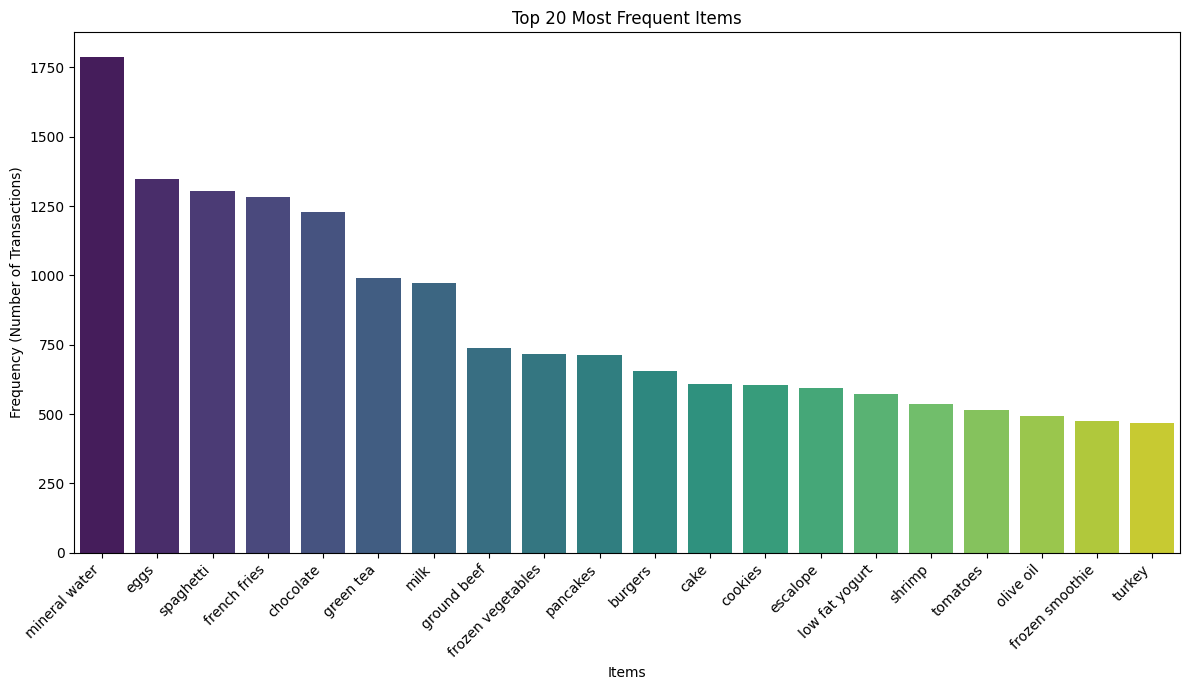

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each item
item_counts = df_encoded.sum().sort_values(ascending=False)

# Select the top 20 items for visualization
top_n = 20
top_items = item_counts.head(top_n)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Most Frequent Items')
plt.xlabel('Items')
plt.ylabel('Frequency (Number of Transactions)')
plt.tight_layout()
plt.show()

##Association Rule Mining:
•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.


In [56]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Frequent Itemsets (first 5 rows):")
display(frequent_itemsets.head())

Frequent Itemsets (first 5 rows):


,support,itemsets
0,0.029733,"(shrimp,almonds,avocado,vegetables mix,green g..."
1,0.012000,"(shrimp,almonds,avocado,vegetables mix,green g..."
2,0.013467,"(shrimp,almonds,avocado,vegetables mix,green g..."
3,0.017600,"(shrimp,almonds,avocado,vegetables mix,green g..."
4,0.012400,"(shrimp,almonds,avocado,vegetables mix,green g..."


##Analysis and Interpretation:
• Analyse the generated rules to identify interesting patterns and relationships between the products. • Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules

In [42]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, min_confidence=0.5)
print("Association Rules (first 5 rows, sorted by lift):")
display(rules.sort_values('lift', ascending=False).head())

Association Rules (first 5 rows, sorted by lift):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [50]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [58]:
rules_relaxed = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules_relaxed = rules_relaxed[rules_relaxed['confidence'] >= 0.2]
print("Association Rules with relaxed thresholds (first 10 rows, sorted by lift):")
display(rules_relaxed.sort_values('lift', ascending=False).head(10))

Association Rules with relaxed thresholds (first 10 rows, sorted by lift):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


##Interview Questions:
1.	What is lift and why is it important in Association rules?
2.	What is support and Confidence. How do you calculate them?
3.	What are some limitations or challenges of Association rules mining?



Definition

Lift shows how much more often two items are bought together compared to if they were independent.
	​
Why Lift is Important

Lift > 1: Items have a positive relationship (bought together more than expected)

Lift = 1: No relationship

Lift < 1: Negative relationship

Helps identify meaningful and useful rules

Avoids misleading rules that only look strong due to high frequency

##What is support and Confidence. How do you calculate them?

Support means how often an item or a group of items appears in the entire dataset. It shows the popularity of the itemset.

Confidence means how often an item is bought when another item is already bought. It shows the reliability or strength of an association rule.

In short:
Support = how frequently something occurs
Confidence = how likely one item follows another

##What are some limitations or challenges of Association rules mining?

Large number of rules: It can generate too many rules, many of which are not useful or interesting.

High computational cost: Mining association rules needs a lot of time and memory, especially with large datasets.

Rare but important items may be ignored: Items with low support are often removed, even if they are important.

Does not show causality: Association rules show relationships, not cause-and-effect.

Hard to choose thresholds: Selecting appropriate support and confidence values is difficult.

Redundant rules: Many rules may convey the same information.

Scalability issues: Performance decreases as the dataset size grows.